In [19]:
import os
import sys

sys.path.append('..')
import numpy as np
import pandas as pd
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from numpy import zeros
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

data = joblib.load('../../outputs/SVM_plot_rbf.pkl')

In [20]:
x = [0.02,0.05,0.1,0.2,0.3,0.4]
y1 = [100*data[(5,i)] for i in x]
y2 = [100*data[(10,i)] for i in x]
y3 = [100*data[(15,i)] for i in x]
y4 = [100*data[(20,i)] for i in x]
y5 = [100*data[(25,i)] for i in x]
y6 = [100*data[(30,i)] for i in x]
y7 = [100*data[(35,i)] for i in x]
x = [600*i for i in x]

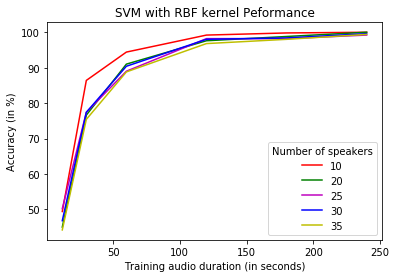

In [25]:
#plt.plot(x, y1, 'c', label = '5')
plt.plot(x, y2, 'r', label = '10')
#plt.plot(x, y3, 'y', label = '15')
plt.plot(x, y4, 'g', label = '20')
plt.plot(x, y5, 'm', label = '25')
plt.plot(x, y6, 'b', label = '30')
plt.plot(x, y7, 'y', label = '35')
plt.xlabel('Training audio duration (in seconds)');
plt.ylabel('Accuracy (in %)');
plt.legend(title = 'Number of speakers');
plt.title('SVM with RBF kernel Peformance')
plt.show();

In [22]:
a = [5,10,15,20,25,30,35]
b1 = [100*data[(i,0.05)] for i in a]
b2 = [100*data[(i,0.1)] for i in a]
b3 = [100*data[(i,0.2)] for i in a]
b4 = [100*data[(i,0.3)] for i in a]
b5 = [100*data[(i,0.4)] for i in a]

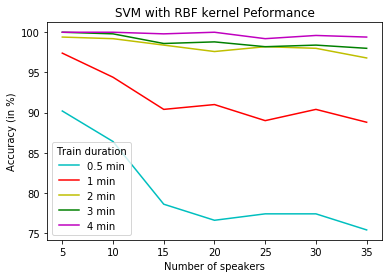

In [23]:
plt.plot(a, b1, 'c', label = '0.5 min')
plt.plot(a, b2, 'r', label = '1 min')
plt.plot(a, b3, 'y', label = '2 min')
plt.plot(a, b4, 'g', label = '3 min')
plt.plot(a, b5, 'm', label = '4 min')
plt.xlabel('Number of speakers');
plt.ylabel('Accuracy (in %)');
plt.legend(title = 'Train duration');
plt.title('SVM with RBF kernel Peformance')
plt.show();